# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [92]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_colwidth',200)

## 1. Read in the file using pandas, and look at the first five rows

In [4]:
df = pd.read_excel("KyotoFullFlower7.xls")
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [8]:
df = pd.read_excel("KyotoFullFlower7.xls", sep=':   ', skiprows=26, names=['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code', 'Data type code', 'Reference Namecode'])
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode
0,802,NaN,NaN,NaN,NaN,-
1,803,NaN,NaN,NaN,NaN,-
2,804,NaN,NaN,NaN,NaN,-
3,805,NaN,NaN,NaN,NaN,-
4,806,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [9]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode
1209,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1210,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [10]:
df = pd.read_excel("KyotoFullFlower7.xls", sep=':   ', skiprows=26, names=['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code', 'Data type code', 'Reference Namecode'], na_values=[0, "UNKNOWN",'-'])

In [11]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode
0,802,NaN,NaN,NaN,NaN,NaN
1,803,NaN,NaN,NaN,NaN,NaN
2,804,NaN,NaN,NaN,NaN,NaN
3,805,NaN,NaN,NaN,NaN,NaN
4,806,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [13]:
df['Source code'].value_counts()

#according to the data dictionary, the answer is " 3; Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272."

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     17
6.0      9
8.0      5
Name: Source code, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [20]:
# test the column
#wrap it as df
flowering = df[df['Full-flowering date (DOY)'].notna()]
flowering

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode
10,812,92.0,401.0,1.0,2.0,NIHON-KOKI
13,815,105.0,415.0,1.0,2.0,NIHON-KOKI
29,831,96.0,406.0,1.0,2.0,NIHON-KOKI
49,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
51,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
62,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
64,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
67,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
87,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
89,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

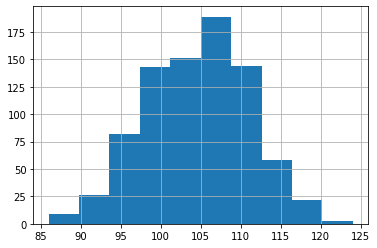

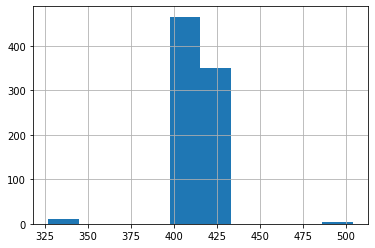

In [58]:
flowering['Full-flowering date'].hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

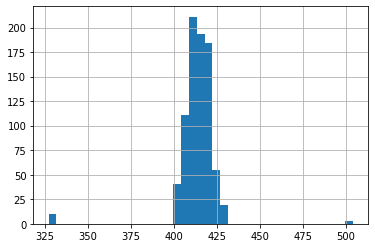

In [59]:
flowering['Full-flowering date'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [61]:
df.describe()
# count(AD) tells us number of records and mean(full flowering date doy tells us the average)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code
count,1214.000000,827.000000,827.000000,827.000000,703.000000
mean,1408.500000,104.540508,413.717050,3.426844,2.041252
std,350.595921,6.407036,12.381731,1.399725,1.128373
min,802.000000,86.000000,327.000000,1.000000,1.000000
25%,1105.250000,100.000000,410.000000,3.000000,2.000000
50%,1408.500000,105.000000,414.000000,3.000000,2.000000
75%,1711.750000,109.000000,419.000000,4.000000,2.000000
max,2015.000000,124.000000,504.000000,8.000000,9.000000


## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [67]:
#before 1900
df[df['AD'] < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [68]:
df[df['AD'] > 1899]['Full-flowering date (DOY)'].mean()

100.32743362831859

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [53]:
# datatype == 4 for poetry
df[df['Data type code']== 4.0].count()


AD                           39
Full-flowering date (DOY)    39
Full-flowering date          39
Source code                  39
Data type code               39
Reference Namecode           39
month                         2
dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [55]:
df[df['Data type code']== 4.0].AD

89       891
93       895
94       896
121      923
153      955
167      969
205     1007
231     1033
234     1036
258     1060
259     1061
282     1084
293     1095
380     1182
388     1190
399     1201
414     1216
417     1219
419     1221
421     1223
434     1236
463     1265
466     1268
467     1269
469     1271
487     1289
499     1301
522     1324
528     1330
645     1447
651     1453
652     1454
672     1474
732     1534
790     1592
838     1640
859     1661
1044    1846
1061    1863
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

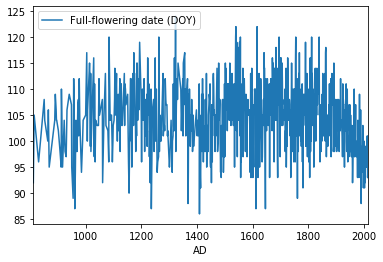

In [73]:
flowering.plot(y='Full-flowering date (DOY)', x='AD', kind='line')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [57]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1209    95.9
1210    96.9
1211    96.4
1212    96.6
1213    96.0
Name: Full-flowering date (DOY), dtype: float64

In [ ]:
## I am not sure I understand the question

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [41]:
#example code 
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

In [93]:
# why does this return an error?
#this comparison works
#df[(df['Full-flowering date'] < 500) & (df['Full-flowering date'] > 399)]
#but the assigning doesn't
#df.loc[df[(df['Full-flowering date'] < 500) & (df['Full-flowering date'] > 399)], 'month'] = 'April'

In [89]:
#this is a cheat, as it runs in reverse order and overwrites months
df.loc[df['Full-flowering date'] < 600, 'month'] = 'May'
df.loc[df['Full-flowering date'] < 500, 'month'] = 'April'
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

### 17. Using your new column, how many blossomings happened in each month?

In [90]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

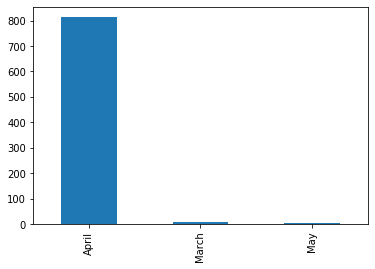

In [91]:
df.month.value_counts().plot(kind="bar")

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [94]:
df['day-of-month'] = df['Full-flowering date']

TypeError: cannot convert the series to <class 'int'>

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [95]:
df['Full-flowering date'].dropna().astype(int).head()

10    401
13    415
29    406
49    418
51    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [115]:
# example code
#df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:]).head()

10    01
13    15
29    06
49    18
51    14
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [118]:
df['day-of-month'] = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode,month,day-of-month
0,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode,month,day-of-month
0,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [157]:
#date = datetime.strptime(date_str3, '%B-%d-%Y')

# got this to the right string format
(df['day-of-month']+"-"+df['month']+"-"+df.AD.astype(str)).astype(str)

df['date'] = (df['day-of-month']+"-"+df['month']+"-"+df.AD.astype(str)).astype(str)
df['date'] = df.date.str.replace("nan", "")

#need to put it into the format datetime can accept, the format is tricky
#datetime.strptime(string, format)
datetime.strptime(df.date.to_string(), '%d-%B-%Y')

#df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Namecode,month,day-of-month,date
1209,2011,99.0,409.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),April,09,09-April-2011
1210,2012,101.0,410.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),April,10,10-April-2012
1211,2013,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),April,03,03-April-2013
1212,2014,94.0,404.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),April,04,04-April-2014
1213,2015,93.0,403.0,8.0,NaN,NEWS-PAPER(ARASHIYAMA),April,03,03-April-2015


ValueError: time data '0                    \n1                    \n2                    \n3                    \n4                    \n5                    \n6                    \n7                    \n8                    \n9                    \n10       01-April-812\n11                   \n12                   \n13       15-April-815\n14                   \n15                   \n16                   \n17                   \n18                   \n19                   \n20                   \n21                   \n22                   \n23                   \n24                   \n25                   \n26                   \n27                   \n28                   \n29       06-April-831\n30                   \n31                   \n32                   \n33                   \n34                   \n35                   \n36                   \n37                   \n38                   \n39                   \n40                   \n41                   \n42                   \n43                   \n44                   \n45                   \n46                   \n47                   \n48                   \n49       18-April-851\n50                   \n51       14-April-853\n52                   \n53                   \n54                   \n55                   \n56                   \n57                   \n58                   \n59                   \n60                   \n61                   \n62       09-April-864\n63                   \n64       16-April-866\n65                   \n66                   \n67       05-April-869\n68                   \n69                   \n70                   \n71                   \n72                   \n73                   \n74                   \n75                   \n76                   \n77                   \n78                   \n79                   \n80                   \n81                   \n82                   \n83                   \n84                   \n85                   \n86                   \n87       14-April-889\n88                   \n89       19-April-891\n90       17-April-892\n91                   \n92       16-April-894\n93       14-April-895\n94       13-April-896\n95                   \n96                   \n97                   \n98                   \n99                   \n100      12-April-902\n101                  \n102                  \n103                  \n104                  \n105                  \n106      07-April-908\n107                  \n108                  \n109                  \n110      04-April-912\n111      20-April-913\n112                  \n113                  \n114                  \n115      05-April-917\n116                  \n117                  \n118                  \n119                  \n120                  \n121      14-April-923\n122                  \n123                  \n124      08-April-926\n125                  \n126                  \n127                  \n128      07-April-930\n129                  \n130                  \n131      16-April-933\n132                  \n133                  \n134                  \n135                  \n136                  \n137                  \n138                  \n139      19-April-941\n140                  \n141                  \n142                  \n143                  \n144                  \n145                  \n146                  \n147      17-April-949\n148      05-April-950\n149                  \n150                  \n151                  \n152                  \n153      30-March-955\n154                  \n155      22-April-957\n156      19-April-958\n157      07-April-959\n158      10-April-960\n159      28-March-961\n160                  \n161      04-April-963\n162                  \n163      14-April-965\n164      08-April-966\n165      13-April-967\n166                  \n167      08-April-969\n168                  \n169                  \n170      16-April-972\n171                  \n172      18-April-974\n173      11-April-975\n174                  \n175      22-April-977\n176                  \n177      14-April-979\n178                  \n179                  \n180                  \n181                  \n182                  \n183      04-April-985\n184                  \n185                  \n186                  \n187      10-April-989\n188                  \n189      14-April-991\n190                  \n191                  \n192                  \n193                  \n194                  \n195                  \n196                  \n197                  \n198     15-April-1000\n199                  \n200                  \n201                  \n202     26-April-1004\n203                  \n204     10-April-1006\n205     16-April-1007\n206                  \n207                  \n208                  \n209                  \n210                  \n211                  \n212     25-April-1014\n213                  \n214     20-April-1016\n215     09-April-1017\n216     23-April-1018\n217     08-April-1019\n218                  \n219                  \n220                  \n221                  \n222                  \n223                  \n224                  \n225                  \n226                  \n227     26-April-1029\n228                  \n229     07-April-1031\n230     20-April-1032\n231     12-April-1033\n232     06-April-1034\n233                  \n234     13-April-1036\n235                  \n236                  \n237                  \n238                  \n239     13-April-1041\n240                  \n241                  \n242                  \n243                  \n244     13-April-1046\n245                  \n246     21-April-1048\n247                  \n248     15-April-1050\n249                  \n250                  \n251                  \n252                  \n253                  \n254                  \n255                  \n256                  \n257                  \n258     17-April-1060\n259     02-April-1061\n260                  \n261                  \n262                  \n263                  \n264     15-April-1066\n265                  \n266                  \n267                  \n268                  \n269     23-April-1071\n270                  \n271     13-April-1073\n272                  \n273                  \n274                  \n275                  \n276                  \n277                  \n278     11-April-1080\n279                  \n280                  \n281     06-April-1083\n282     29-April-1084\n283                  \n284                  \n285                  \n286     13-April-1088\n287                  \n288     15-April-1090\n289                  \n290                  \n291     15-April-1093\n292                  \n293     10-April-1095\n294     05-April-1096\n295                  \n296     10-April-1098\n297     13-April-1099\n298                  \n299                  \n300     14-April-1102\n301                  \n302     17-April-1104\n303     24-April-1105\n304                  \n305     15-April-1107\n306                  \n307                  \n308                  \n309     23-April-1111\n310     13-April-1112\n311                  \n312     10-April-1114\n313                  \n314                  \n315     19-April-1117\n316     12-April-1118\n317                  \n318     13-April-1120\n319                  \n320                  \n321     22-April-1123\n322     07-April-1124\n323     21-April-1125\n324     18-April-1126\n325     17-April-1127\n326     20-April-1128\n327     16-April-1129\n328     13-April-1130\n329     13-April-1131\n330                  \n331                  \n332     16-April-1134\n333                  \n334                  \n335                  \n336                  \n337     23-April-1139\n338     12-April-1140\n339     21-April-1141\n340                  \n341     20-April-1143\n342                  \n343     17-April-1145\n344                  \n345                  \n346                  \n347                  \n348                  \n349     19-April-1151\n350                  \n351                  \n352     06-April-1154\n353                  \n354     30-March-1156\n355                  \n356                  \n357     13-April-1159\n358                  \n359     22-April-1161\n360                  \n361     22-April-1163\n362     09-April-1164\n363     16-April-1165\n364     05-April-1166\n365     21-April-1167\n366                  \n367     22-April-1169\n368     23-April-1170\n369                  \n370     12-April-1172\n371     27-April-1173\n372     22-April-1174\n373     23-April-1175\n374     22-April-1176\n375                  \n376                  \n377     13-April-1179\n378     07-April-1180\n379                  \n380     14-April-1182\n381     11-April-1183\n382     24-April-1184\n383     25-April-1185\n384                  \n385     14-April-1187\n386     16-April-1188\n387                  \n388     22-April-1190\n389     16-April-1191\n390                  \n391                  \n392     29-April-1194\n393                  \n394                  \n395                  \n396                  \n397     19-April-1199\n398     13-April-1200\n399     06-April-1201\n400     16-April-1202\n401     15-April-1203\n402     19-April-1204\n403     15-April-1205\n404                  \n405     14-April-1207\n406                  \n407                  \n408     22-April-1210\n409                  \n410     07-April-1212\n411     17-April-1213\n412     12-April-1214\n413     18-April-1215\n414     10-April-1216\n415                  \n416                  \n417     11-April-1219\n418     18-April-1220\n419     09-April-1221\n420                  \n421     26-April-1223\n422                  \n423     15-April-1225\n424     16-April-1226\n425     21-April-1227\n426                  \n427     07-April-1229\n428     12-April-1230\n429     11-April-1231\n430     01-April-1232\n431     15-April-1233\n432                  \n433     20-April-1235\n434     27-March-1236\n435                  \n436                  \n437                  \n438     15-April-1240\n439                  \n440                  \n441                  \n442     17-April-1244\n443     18-April-1245\n444     08-April-1246\n445     16-April-1247\n446                  \n447     18-April-1249\n448     26-April-1250\n449     10-April-1251\n450                  \n451                  \n452     20-April-1254\n453                  \n454                  \n455     04-April-1257\n456                  \n457     06-April-1259\n458                  \n459                  \n460     07-April-1262\n461     30-April-1263\n462     12-April-1264\n463     08-April-1265\n464                  \n465     15-April-1267\n466     12-April-1268\n467     10-April-1269\n468                  \n469     10-April-1271\n470                  \n471                  \n472                  \n473     17-April-1275\n474                  \n475                  \n476     23-April-1278\n477     11-April-1279\n478     11-April-1280\n479                  \n480                  \n481     13-April-1283\n482     11-April-1284\n483     15-April-1285\n484     22-April-1286\n485     20-April-1287\n486     17-April-1288\n487     17-April-1289\n488                  \n489                  \n490     16-April-1292\n491                  \n492     11-April-1294\n493     12-April-1295\n494                  \n495                  \n496                  \n497                  \n498                  \n499     05-April-1301\n500     06-April-1302\n501                  \n502                  \n503                  \n504                  \n505     14-April-1307\n506                  \n507                  \n508                  \n509     04-April-1311\n510     09-April-1312\n511                  \n512     11-April-1314\n513     21-April-1315\n514     12-April-1316\n515     12-April-1317\n516                  \n517     26-April-1319\n518                  \n519     12-April-1321\n520     16-April-1322\n521       04-May-1323\n522     07-April-1324\n523                  \n524     17-April-1326\n525                  \n526                  \n527     22-April-1329\n528     18-April-1330\n529     22-April-1331\n530     24-April-1332\n531                  \n532                  \n533                  \n534                  \n535                  \n536                  \n537                  \n538                  \n539                  \n540     20-April-1342\n541                  \n542     11-April-1344\n543                  \n544     17-April-1346\n545     19-April-1347\n546                  \n547     22-April-1349\n548     11-April-1350\n549     25-April-1351\n550                  \n551                  \n552                  \n553                  \n554     26-April-1356\n555     17-April-1357\n556     20-April-1358\n557     15-April-1359\n558     10-April-1360\n559     18-April-1361\n560                  \n561     17-April-1363\n562     19-April-1364\n563                  \n564     22-April-1366\n565     07-April-1367\n566     28-March-1368\n567     04-April-1369\n568     19-April-1370\n569                  \n570     11-April-1372\n571     20-April-1373\n572                  \n573     13-April-1375\n574     08-April-1376\n575     15-April-1377\n576     14-April-1378\n577     13-April-1379\n578     11-April-1380\n579     18-April-1381\n580     15-April-1382\n581     12-April-1383\n582     07-April-1384\n583     09-April-1385\n584     15-April-1386\n585     10-April-1387\n586     08-April-1388\n587                  \n588                  \n589                  \n590                  \n591                  \n592                  \n593                  \n594                  \n595                  \n596     16-April-1398\n597                  \n598                  \n599     11-April-1401\n600     13-April-1402\n601     14-April-1403\n602                  \n603                  \n604     12-April-1406\n605     11-April-1407\n606     20-April-1408\n607     27-March-1409\n608     12-April-1410\n609                  \n610     02-April-1412\n611     01-April-1413\n612                  \n613     15-April-1415\n614     10-April-1416\n615     19-April-1417\n616     08-April-1418\n617     10-April-1419\n618     21-April-1420\n619     09-April-1421\n620     19-April-1422\n621     06-April-1423\n622     12-April-1424\n623     08-April-1425\n624     09-April-1426\n625     12-April-1427\n626                  \n627     08-April-1429\n628     18-April-1430\n629     12-April-1431\n630     13-April-1432\n631     08-April-1433\n632     23-April-1434\n633     05-April-1435\n634     10-April-1436\n635     13-April-1437\n636     09-April-1438\n637     11-April-1439\n638     07-April-1440\n639     15-April-1441\n640                  \n641     17-April-1443\n642     18-April-1444\n643                  \n644     18-April-1446\n645     21-April-1447\n646     05-April-1448\n647     05-April-1449\n648     10-April-1450\n649     13-April-1451\n650     01-April-1452\n651     17-April-1453\n652     15-April-1454\n653     06-April-1455\n654     15-April-1456\n655     15-April-1457\n656     22-April-1458\n657     23-April-1459\n658     20-April-1460\n659     16-April-1461\n660     16-April-1462\n661     11-April-1463\n662     13-April-1464\n663     08-April-1465\n664     15-April-1466\n665     11-April-1467\n666     10-April-1468\n667                  \n668                  \n669                  \n670     23-April-1472\n671                  \n672     08-April-1474\n673                  \n674     09-April-1476\n675     20-April-1477\n676     25-April-1478\n677     20-April-1479\n678     13-April-1480\n679     16-April-1481\n680     18-April-1482\n681     11-April-1483\n682     06-April-1484\n683     04-April-1485\n684     09-April-1486\n685     03-April-1487\n686     12-April-1488\n687     10-April-1489\n688     07-April-1490\n689     17-April-1491\n690     17-April-1492\n691     10-April-1493\n692     16-April-1494\n693     04-April-1495\n694     06-April-1496\n695     18-April-1497\n696     07-April-1498\n697     21-April-1499\n698     07-April-1500\n699     13-April-1501\n700     25-April-1502\n701     18-April-1503\n702     23-April-1504\n703     16-April-1505\n704     16-April-1506\n705     18-April-1507\n706     20-April-1508\n707     12-April-1509\n708     20-April-1510\n709     21-April-1511\n710     18-April-1512\n711     20-April-1513\n712     15-April-1514\n713     21-April-1515\n714     13-April-1516\n715     16-April-1517\n716     25-April-1518\n717     21-April-1519\n718     14-April-1520\n719     17-April-1521\n720     13-April-1522\n721     19-April-1523\n722     18-April-1524\n723     14-April-1525\n724     23-April-1526\n725     15-April-1527\n726     15-April-1528\n727     17-April-1529\n728     17-April-1530\n729     13-April-1531\n730     17-April-1532\n731     21-April-1533\n732     18-April-1534\n733     05-April-1535\n734     17-April-1536\n735     18-April-1537\n736     22-April-1538\n737     30-April-1539\n738       01-May-1540\n739     19-April-1541\n740     12-April-1542\n741     29-April-1543\n742     16-April-1544\n743     07-April-1545\n744     22-April-1546\n745     14-April-1547\n746     27-April-1548\n747     27-April-1549\n748     21-April-1550\n749     19-April-1551\n750     13-April-1552\n751     29-April-1553\n752                  \n753     11-April-1555\n754     29-April-1556\n755     03-April-1557\n756     21-April-1558\n757     06-April-1559\n758     09-April-1560\n759     12-April-1561\n760     09-April-1562\n761     09-April-1563\n762     18-April-1564\n763     24-April-1565\n764     07-April-1566\n765     18-April-1567\n766     15-April-1568\n767                  \n768     22-April-1570\n769     18-April-1571\n770     16-April-1572\n771                  \n772     08-April-1574\n773                  \n774     18-April-1576\n775     10-April-1577\n776                  \n777     12-April-1579\n778     06-April-1580\n779     15-April-1581\n780                  \n781     18-April-1583\n782     15-April-1584\n783     15-April-1585\n784     16-April-1586\n785     15-April-1587\n786     15-April-1588\n787     15-April-1589\n788     12-April-1590\n789     04-April-1591\n790     07-April-1592\n791     23-April-1593\n792     03-April-1594\n793     21-April-1595\n794     13-April-1596\n795     24-April-1597\n796     20-April-1598\n797     13-April-1599\n798     10-April-1600\n799     03-April-1601\n800     17-April-1602\n801     09-April-1603\n802     04-April-1604\n803     15-April-1605\n804     16-April-1606\n805     20-April-1607\n806                  \n807     18-April-1609\n808     20-April-1610\n809                  \n810     27-March-1612\n811     16-April-1613\n812     13-April-1614\n813     20-April-1615\n814       01-May-1616\n815     17-April-1617\n816     12-April-1618\n817     03-April-1619\n818                  \n819     19-April-1621\n820     16-April-1622\n821     23-April-1623\n822     21-April-1624\n823     05-April-1625\n824     10-April-1626\n825                  \n826     13-April-1628\n827     22-April-1629\n828                  \n829                  \n830     13-April-1632\n831     08-April-1633\n832     06-April-1634\n833     07-April-1635\n834                  \n835     15-April-1637\n836     15-April-1638\n837     18-April-1639\n838     12-April-1640\n839     27-April-1641\n840     24-April-1642\n841     24-April-1643\n842     14-April-1644\n843     09-April-1645\n844     28-March-1646\n845     22-April-1647\n846                  \n847     14-April-1649\n848     12-April-1650\n849     17-April-1651\n850     16-April-1652\n851     22-April-1653\n852     14-April-1654\n853     14-April-1655\n854     12-April-1656\n855                  \n856     18-April-1658\n857                  \n858     20-April-1660\n859     03-April-1661\n860     20-April-1662\n861     15-April-1663\n862     14-April-1664\n863     22-April-1665\n864     18-April-1666\n865     22-April-1667\n866     19-April-1668\n867     14-April-1669\n868     12-April-1670\n869     26-April-1671\n870     21-April-1672\n871     15-April-1673\n872     25-April-1674\n873     21-April-1675\n874     12-April-1676\n875     06-April-1677\n876     19-April-1678\n877     24-April-1679\n878     18-April-1680\n879     20-April-1681\n880     14-April-1682\n881     18-April-1683\n882     27-April-1684\n883     16-April-1685\n884     14-April-1686\n885     14-April-1687\n886     23-April-1688\n887     07-April-1689\n888     03-April-1690\n889     13-April-1691\n890     18-April-1692\n891     17-April-1693\n892     19-April-1694\n893     30-April-1695\n894     23-April-1696\n895     21-April-1697\n896     11-April-1698\n897     07-April-1699\n898     26-April-1700\n899     22-April-1701\n900     26-April-1702\n901     13-April-1703\n902     22-April-1704\n903     19-April-1705\n904     25-April-1706\n905     21-April-1707\n906     12-April-1708\n907     16-April-1709\n908                  \n909                  \n910                  \n911     14-April-1713\n912     18-April-1714\n913     17-April-1715\n914     19-April-1716\n915     08-April-1717\n916     12-April-1718\n917     12-April-1719\n918     23-April-1720\n919     05-April-1721\n920     10-April-1722\n921     14-April-1723\n922     08-April-1724\n923     16-April-1725\n924     26-April-1726\n925     22-April-1727\n926     13-April-1728\n927     15-April-1729\n928                  \n929     14-April-1731\n930     17-April-1732\n931     17-April-1733\n932     12-April-1734\n933     11-April-1735\n934     15-April-1736\n935     03-April-1737\n936     11-April-1738\n937     20-April-1739\n938     24-April-1740\n939     19-April-1741\n940     19-April-1742\n941     18-April-1743\n942     07-April-1744\n943     15-April-1745\n944     20-April-1746\n945     11-April-1747\n946     05-April-1748\n947     10-April-1749\n948     20-April-1750\n949     13-April-1751\n950     19-April-1752\n951     06-April-1753\n952     25-April-1754\n953     30-April-1755\n954     18-April-1756\n955     22-April-1757\n956     11-April-1758\n957     19-April-1759\n958     12-April-1760\n959     30-March-1761\n960     16-April-1762\n961     22-April-1763\n962     07-April-1764\n963     16-April-1765\n964     23-April-1766\n965     11-April-1767\n966     26-April-1768\n967     15-April-1769\n968     15-April-1770\n969     14-April-1771\n970     15-April-1772\n971     10-April-1773\n972     20-April-1774\n973     09-April-1775\n974     17-April-1776\n975     14-April-1777\n976     21-April-1778\n977     06-April-1779\n978     18-April-1780\n979     01-April-1781\n980     19-April-1782\n981     13-April-1783\n982     14-April-1784\n983     18-April-1785\n984     16-April-1786\n985     15-April-1787\n986     18-April-1788\n987     16-April-1789\n988     29-April-1790\n989     09-April-1791\n990     10-April-1792\n991     16-April-1793\n992     14-April-1794\n993     23-April-1795\n994     12-April-1796\n995     07-April-1797\n996     20-April-1798\n997     13-April-1799\n998     13-April-1800\n999     15-April-1801\n1000    06-April-1802\n1001    20-April-1803\n1002    13-April-1804\n1003    03-April-1805\n1004    24-April-1806\n1005    26-April-1807\n1006    07-April-1808\n1007    17-April-1809\n1008    10-April-1810\n1009    20-April-1811\n1010    29-April-1812\n1011    17-April-1813\n1012    23-April-1814\n1013    21-April-1815\n1014    12-April-1816\n1015    20-April-1817\n1016    16-April-1818\n1017    16-April-1819\n1018    04-April-1820\n1019    19-April-1821\n1020    12-April-1822\n1021    16-April-1823\n1022    17-April-1824\n1023    24-April-1825\n1024    19-April-1826\n1025    10-April-1827\n1026    22-April-1828\n1027    22-April-1829\n1028    15-April-1830\n1029    24-April-1831\n1030    22-April-1832\n1031    17-April-1833\n1032    21-April-1834\n1033    22-April-1835\n1034    21-April-1836\n1035    21-April-1837\n1036    19-April-1838\n1037    30-April-1839\n1038    14-April-1840\n1039    17-April-1841\n1040    06-April-1842\n1041    16-April-1843\n1042    15-April-1844\n1043    12-April-1845\n1044    08-April-1846\n1045    17-April-1847\n1046    11-April-1848\n1047    10-April-1849\n1048    19-April-1850\n1049    12-April-1851\n1050    22-April-1852\n1051    12-April-1853\n1052    12-April-1854\n1053    11-April-1855\n1054    20-April-1856\n1055    18-April-1857\n1056    14-April-1858\n1057    20-April-1859\n1058    22-April-1860\n1059    10-April-1861\n1060    27-April-1862\n1061    28-April-1863\n1062    14-April-1864\n1063    07-April-1865\n1064    12-April-1866\n1065    11-April-1867\n1066    13-April-1868\n1067    15-April-1869\n1068    09-April-1870\n1069    14-April-1871\n1070                 \n1071    14-April-1873\n1072    17-April-1874\n1073    13-April-1875\n1074    20-April-1876\n1075    14-April-1877\n1076    11-April-1878\n1077    12-April-1879\n1078    19-April-1880\n1079    22-April-1881\n1080    07-April-1882\n1081    17-April-1883\n1082    18-April-1884\n1083    23-April-1885\n1084    18-April-1886\n1085    19-April-1887\n1086    16-April-1888\n1087    19-April-1889\n1088    08-April-1890\n1089    09-April-1891\n1090    24-April-1892\n1091    19-April-1893\n1092    08-April-1894\n1093                 \n1094    15-April-1896\n1095    16-April-1897\n1096    18-April-1898\n1097    09-April-1899\n1098    12-April-1900\n1099    12-April-1901\n1100    08-April-1902\n1101    09-April-1903\n1102    17-April-1904\n1103    15-April-1905\n1104    15-April-1906\n1105    13-April-1907\n1106    11-April-1908\n1107    18-April-1909\n1108    14-April-1910\n1109    08-April-1911\n1110    14-April-1912\n1111    13-April-1913\n1112    12-April-1914\n1113    12-April-1915\n1114    21-April-1916\n1115    13-April-1917\n1116    14-April-1918\n1117                 \n1118    13-April-1920\n1119                 \n1120    11-April-1922\n1121    07-April-1923\n1122    20-April-1924\n1123    18-April-1925\n1124    18-April-1926\n1125    17-April-1927\n1126    16-April-1928\n1127    13-April-1929\n1128    05-April-1930\n1129    15-April-1931\n1130    14-April-1932\n1131    16-April-1933\n1132    14-April-1934\n1133    12-April-1935\n1134    20-April-1936\n1135    10-April-1937\n1136    08-April-1938\n1137    14-April-1939\n1138    19-April-1940\n1139    10-April-1941\n1140    06-April-1942\n1141    11-April-1943\n1142    09-April-1944\n1143                 \n1144    07-April-1946\n1145    17-April-1947\n1146    11-April-1948\n1147    17-April-1949\n1148    09-April-1950\n1149    08-April-1951\n1150    14-April-1952\n1151    11-April-1953\n1152    08-April-1954\n1153    07-April-1955\n1154    08-April-1956\n1155    13-April-1957\n1156    09-April-1958\n1157    02-April-1959\n1158    04-April-1960\n1159    09-April-1961\n1160    12-April-1962\n1161    11-April-1963\n1162    08-April-1964\n1163    20-April-1965\n1164    07-April-1966\n1165    07-April-1967\n1166    08-April-1968\n1167    11-April-1969\n1168    17-April-1970\n1169    08-April-1971\n1170    08-April-1972\n1171    07-April-1973\n1172    09-April-1974\n1173    10-April-1975\n1174    08-April-1976\n1175    03-April-1977\n1176    14-April-1978\n1177    07-April-1979\n1178    11-April-1980\n1179    09-April-1981\n1180    03-April-1982\n1181    09-April-1983\n1182    18-April-1984\n1183    09-April-1985\n1184    12-April-1986\n1185    05-April-1987\n1186    15-April-1988\n1187    03-April-1989\n1188    29-March-1990\n1189    07-April-1991\n1190    03-April-1992\n1191    07-April-1993\n1192    09-April-1994\n1193    09-April-1995\n1194    12-April-1996\n1195    07-April-1997\n1196    01-April-1998\n1197    04-April-1999\n1198    09-April-2000\n1199    06-April-2001\n1200    01-April-2002\n1201    08-April-2003\n1202    01-April-2004\n1203    09-April-2005\n1204    08-April-2006\n1205    07-April-2007\n1206    04-April-2008\n1207    05-April-2009\n1208    05-April-2010\n1209    09-April-2011\n1210    10-April-2012\n1211    03-April-2013\n1212    04-April-2014\n1213    03-April-2015' does not match format '%d-%B-%Y'

# YOU ARE DONE.

And **incredible.**